# Bike Sale Price Prediction Project.

###### *This Project analyzing the Selling Price of Bikes and using the machine learning to predict the future based prices of bikes.*

#### Project – Overview

 *This project focuses on analyzing and predicting the selling price of used bikes using machine learning techniques. The primary objective is to understand the factors that influence bike prices, such as brand, model, manufacturing year, kilometers driven, mileage, engine power, and ownership details. By leveraging historical bike sales data, the aim is to develop a predictive model capable of estimating a fair resale value for different bikes.*

 *The insights generated from this project can help buyers, sellers, and online resale platforms make informed decisions about used bike pricing, ensuring transparency, accuracy, and better market understanding in the second-hand bike industry.*


### Columns Overview:

**Brand** – Name of the company (e.g., Hero, Honda, Yamaha)

**Model** – specific model of the bike

**Year** – manufacturing year of bike

**Kms_Driven** – total kilometers driven by bikes .

**Owner_type** – total number of previous owners

**Engine** – how much Power of engine (in CC)

**Mileage** – mileage (in km/l)

**registration_city** – the city where the bike was originally registered.  

**Price** – target column (selling price in ₹)

**Transmission** -  gear system used in the bike (manual or automatic.)

**Fuel_type** - fuel used by the bike — such as petrol or electric.

#### importing important libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

**Load the dataset**

In [210]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\hardik_bikes.csv")
df

,Brand,Model,Year,Engine_CC,Mileage_kmpl,Kms_Driven,Fuel_Type,Transmission,Owner_Type,Registration_City,Price_INR
0,Yamaha,FZ,2011,150,39.4,42551,Petrol,Manual,First,Mumbai,5435
1,Yamaha,R15,2007,350,35.1,48638,Petrol,Manual,First,Mumbai,7459
2,Honda,CB Shine,2010,110,42.7,38274,Petrol,Manual,Second,Jaipur,4765
3,TVS,Apache,2016,100,35.4,36531,Petrol,Manual,First,Bengaluru,9775
4,Yamaha,YZF,2014,650,25.5,22701,Petrol,Manual,Second,Mumbai,18215
...,...,...,...,...,...,...,...,...,...,...,...
1995,Bajaj,CT100,2011,110,49.8,43778,Petrol,Manual,First,Bengaluru,4299
1996,Yamaha,YZF,2009,150,41.8,42464,Electric,Manual,First,Kolkata,5415
1997,Honda,Unicorn,2025,110,45.7,11264,Petrol,Automatic,First,Bengaluru,46170
1998,TVS,Apache,2020,150,60.4,15610,Petrol,Manual,First,Hyderabad,33453


In [211]:
df.info()
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              2000 non-null   object 
 1   Model              2000 non-null   object 
 2   Year               2000 non-null   int64  
 3   Engine_CC          2000 non-null   int64  
 4   Mileage_kmpl       2000 non-null   float64
 5   Kms_Driven         2000 non-null   int64  
 6   Fuel_Type          2000 non-null   object 
 7   Transmission       2000 non-null   object 
 8   Owner_Type         2000 non-null   object 
 9   Registration_City  2000 non-null   object 
 10  Price_INR          2000 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
Brand                0
Model                0
Year                 0
Engine_CC            0
Mileage_kmpl         0
Kms_Driven           0
Fuel_Type            0
Transmission         0
Owner_Type           

In [212]:
df.describe()

,Year,Engine_CC,Mileage_kmpl,Kms_Driven,Price_INR
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2015.210000,302.860000,36.453050,35995.231500,30374.900500
std,6.035654,199.705374,9.164739,54917.923786,43925.595624
min,2005.000000,100.000000,12.200000,0.000000,427.000000
25%,2010.000000,125.000000,29.000000,20792.750000,5952.750000
50%,2015.000000,200.000000,35.400000,31592.000000,14902.500000
75%,2020.000000,450.000000,44.125000,42584.250000,43066.250000
max,2025.000000,650.000000,60.500000,976618.000000,907554.000000


**Visualization Data**

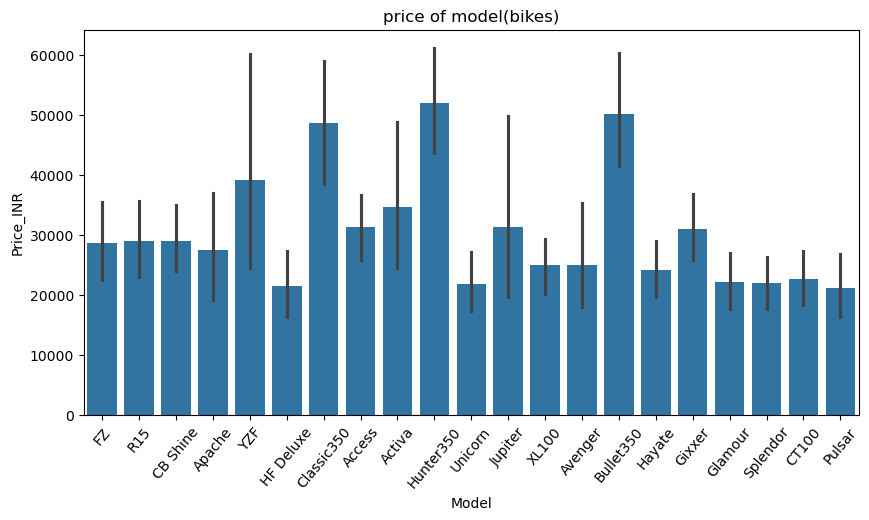

In [213]:
# Prices of Model by engine_cc:
plt.figure(figsize=(10,5))
sns.barplot(x="Model",y="Price_INR",data=df)
plt.title("price of model(bikes)")
plt.xticks(rotation=50)
plt.show()

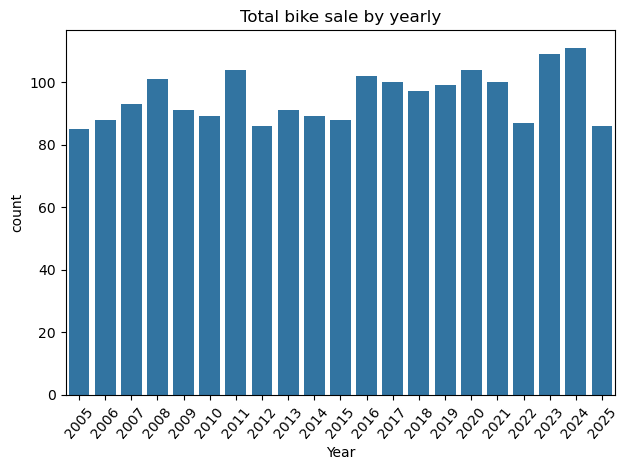

In [214]:
sns.countplot(x="Year",data=df,)
plt.title("Total bike sale by yearly")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

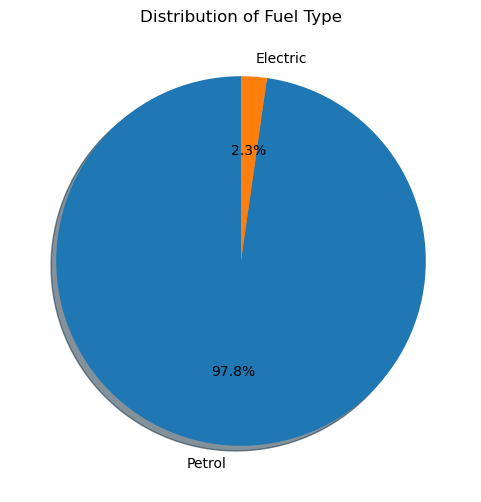

In [215]:
fuel_counts = df['Fuel_Type'].value_counts()   # for categorical values.

plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Distribution of Fuel Type')
plt.show()

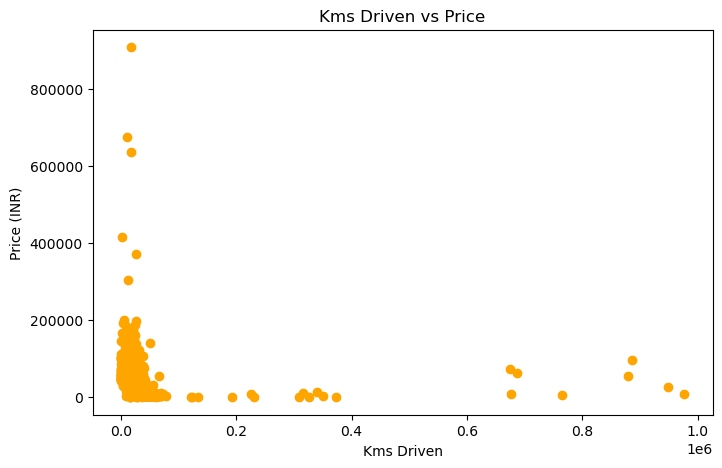

In [216]:
plt.figure(figsize=(8,5))
plt.scatter(df["Kms_Driven"], df["Price_INR"], color='orange')
plt.title("Kms Driven vs Price")
plt.xlabel("Kms Driven")
plt.ylabel("Price (INR)")
plt.show()

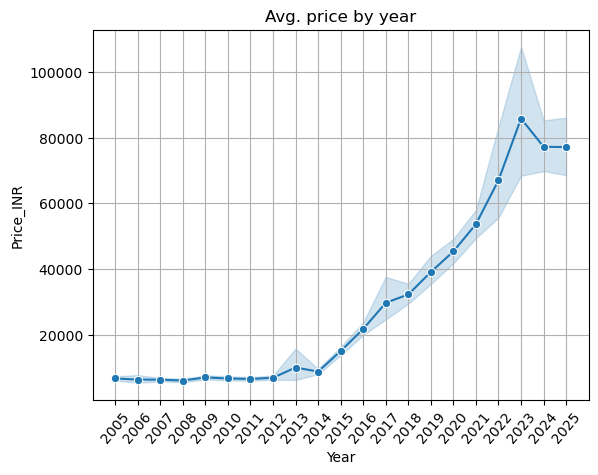

In [217]:
sns.lineplot(x="Year",y="Price_INR",marker="o",data=df)
plt.title("Avg. price by year")

plt.xlabel("Year")
plt.ylabel("Price_INR")

plt.xticks(sorted(df["Year"].unique().astype(int)))   # isse sare years aaye hai.
plt.xticks(rotation=50)
plt.grid()
plt.show()

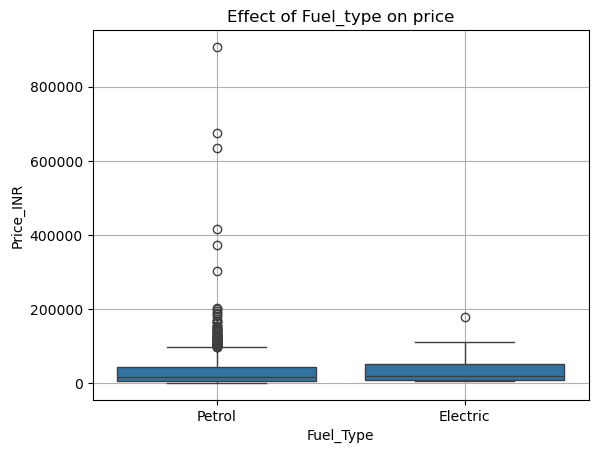

In [218]:
sns.boxplot(x="Fuel_Type",y="Price_INR",data=df)

plt.title("Effect of Fuel_type on price")
plt.grid()
plt.show()

In [219]:
import plotly.express as px
bike=px.bar(df,x="Engine_CC",y="Price_INR",hover_data={"Engine_CC":True,"Price_INR":True},title="Price of bikes by Engine_cc")

#plt.title("Price of bikes by Engine_cc")

bike.show()

In [220]:
# sns.scatterplot(x='Engine_CC', y='Price_INR', hue='Fuel_Type', data=df)
# plt.title('Engine CC vs Price (by Fuel Type)')
# plt.xlabel('Engine CC')
# plt.ylabel('Price')
# plt.show()

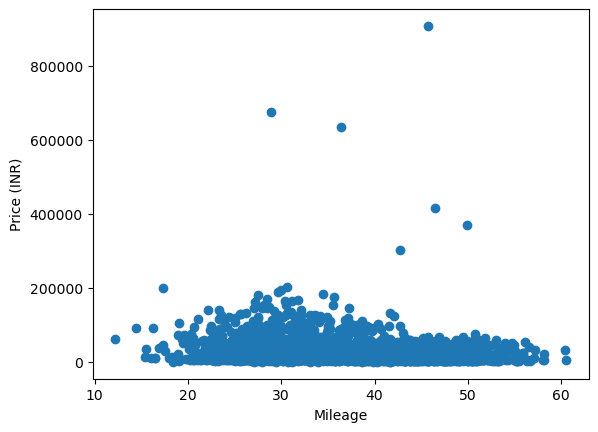

In [221]:
 plt.scatter(df["Mileage_kmpl"],df["Price_INR"])
 plt.xlabel("Mileage")
 plt.ylabel("Price (INR)")
 plt.show()

#### pearson corelation test

In [222]:

corr=df[["Year","Engine_CC","Mileage_kmpl","Kms_Driven","Price_INR"]].corr()

print(corr)

                  Year  Engine_CC  Mileage_kmpl  Kms_Driven  Price_INR
Year          1.000000   0.001734     -0.008258   -0.170011   0.567720
Engine_CC     0.001734   1.000000     -0.656075    0.017243   0.223911
Mileage_kmpl -0.008258  -0.656075      1.000000   -0.022784  -0.132414
Kms_Driven   -0.170011   0.017243     -0.022784    1.000000  -0.126389
Price_INR     0.567720   0.223911     -0.132414   -0.126389   1.000000


<Axes: >

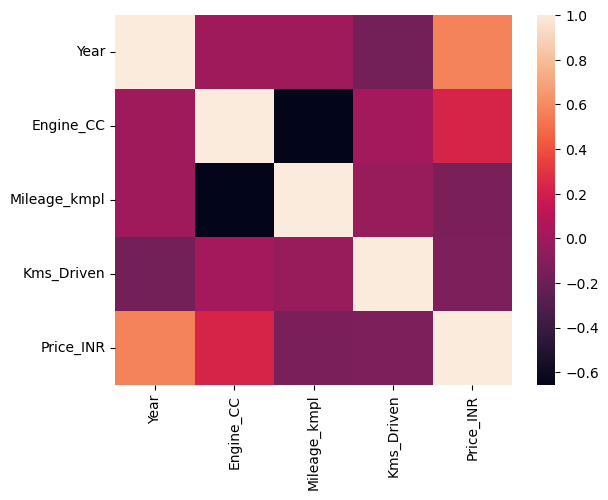

In [223]:
sns.heatmap(corr)

### Detect the outliers:

<Axes: ylabel='Kms_Driven'>

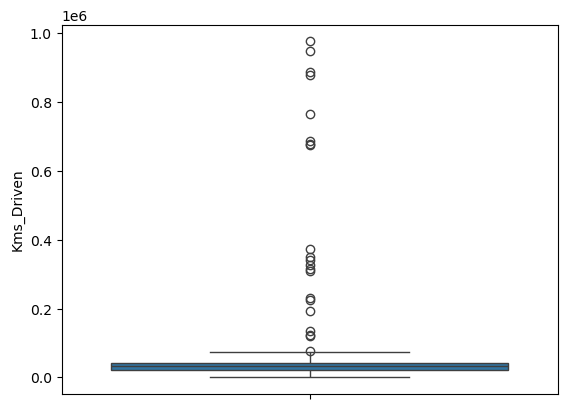

In [224]:
sns.boxplot(df["Kms_Driven"])

In [225]:
q1=df["Kms_Driven"].quantile(0.25)
q3=df["Kms_Driven"].quantile(0.75)
iqr=q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

Outlier = df[(df["Kms_Driven"] < lower_limit) | (df["Kms_Driven"] > upper_limit)]
print("Outlier in Kms_drien:")
print(Outlier["Kms_Driven"])

Outlier in Kms_drien:
86      123306
215     764944
224     315852
267     225496
438     686917
539     879649
553      77967
581     976618
626     193366
936     673938
1114    349849
1219    308222
1311    325449
1340    948869
1388    121058
1407    230204
1576    886643
1718    340035
1773    676863
1890    134407
1903    372659
Name: Kms_Driven, dtype: int64


##### remove the outliers from Kms_Driven:

In [226]:
# remove the outliers from Kms_Driven:
q1=df["Kms_Driven"].quantile(0.25)
q3=df["Kms_Driven"].quantile(0.75)
iqr=q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr



In [227]:
df=df[(df["Kms_Driven"] >= lower_limit) & (df["Kms_Driven"] <= upper_limit)]

In [228]:
df

,Brand,Model,Year,Engine_CC,Mileage_kmpl,Kms_Driven,Fuel_Type,Transmission,Owner_Type,Registration_City,Price_INR
0,Yamaha,FZ,2011,150,39.4,42551,Petrol,Manual,First,Mumbai,5435
1,Yamaha,R15,2007,350,35.1,48638,Petrol,Manual,First,Mumbai,7459
2,Honda,CB Shine,2010,110,42.7,38274,Petrol,Manual,Second,Jaipur,4765
3,TVS,Apache,2016,100,35.4,36531,Petrol,Manual,First,Bengaluru,9775
4,Yamaha,YZF,2014,650,25.5,22701,Petrol,Manual,Second,Mumbai,18215
...,...,...,...,...,...,...,...,...,...,...,...
1995,Bajaj,CT100,2011,110,49.8,43778,Petrol,Manual,First,Bengaluru,4299
1996,Yamaha,YZF,2009,150,41.8,42464,Electric,Manual,First,Kolkata,5415
1997,Honda,Unicorn,2025,110,45.7,11264,Petrol,Automatic,First,Bengaluru,46170
1998,TVS,Apache,2020,150,60.4,15610,Petrol,Manual,First,Hyderabad,33453


<Axes: ylabel='Kms_Driven'>

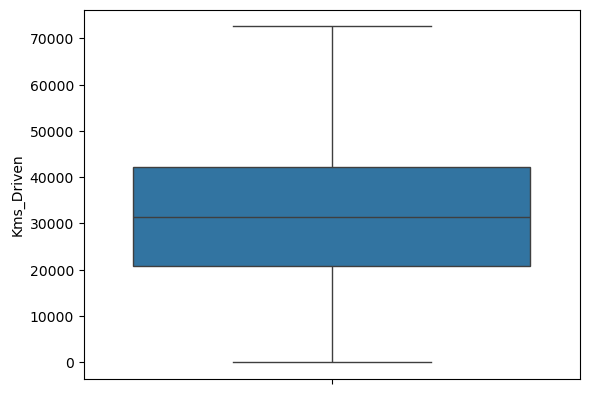

In [229]:
sns.boxplot(df["Kms_Driven"])

***Detect the outliers in Price:***

<Axes: ylabel='Price_INR'>

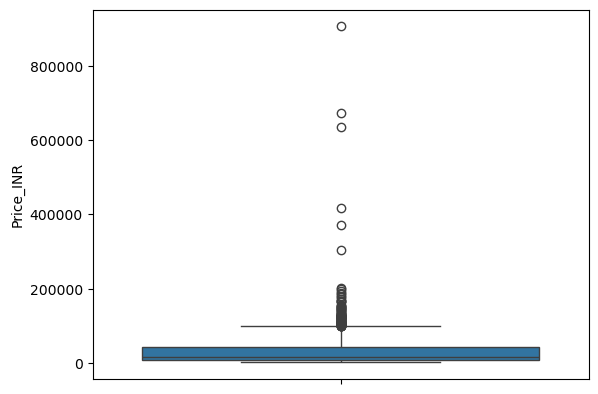

In [230]:
sns.boxplot(df["Price_INR"])

In [231]:
q1=df["Price_INR"].quantile(0.25)
q3=df["Price_INR"].quantile(0.75)
iqr = q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

outlier = df[(df["Price_INR"] < lower_limit) | (df["Price_INR"] >upper_limit)]

print("Outliers in Price:")
print(outlier["Price_INR"])

Outliers in Price:
7       171393
60      907554
113     103366
134     101214
155     106080
         ...  
1834    131228
1886    120732
1891    109085
1893    121369
1948    146488
Name: Price_INR, Length: 86, dtype: int64


In [232]:
# remove the outleir in price::
q1=df["Price_INR"].quantile(0.25)
q3=df["Price_INR"].quantile(0.75)
iqr = q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

df=df[(df["Price_INR"] >= lower_limit) & (df["Price_INR"] <= upper_limit)]


<Axes: ylabel='Price_INR'>

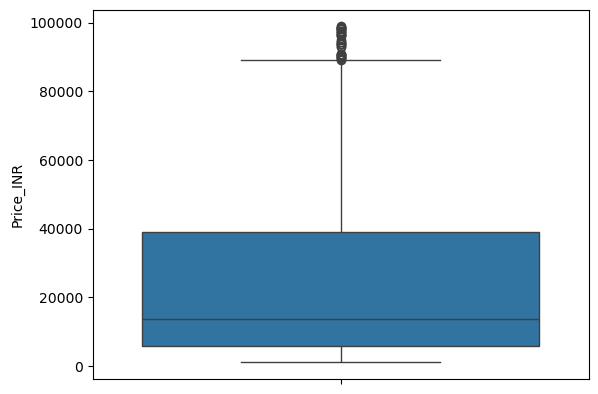

In [233]:
sns.boxplot(df["Price_INR"])

In [234]:
q1=df["Price_INR"].quantile(0.25)
q3=df["Price_INR"].quantile(0.75)
iqr = q3-q1

lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

outlier = df[(df["Price_INR"] < lower_limit) | (df["Price_INR"] >upper_limit)]

print("Outliers in Price:")
print(outlier["Price_INR"])

Outliers in Price:
80      89846
93      98463
138     97476
218     89592
249     94770
284     90659
287     90573
289     94444
343     93608
509     93761
561     97442
590     90107
855     96510
890     93622
891     96490
921     89520
987     98468
1160    89144
1277    97107
1313    98220
1389    92837
1395    90905
1473    98617
1499    89989
1637    95994
1643    98299
1648    94432
1673    90931
1710    98243
1726    97072
1766    98892
1786    93054
1986    96717
Name: Price_INR, dtype: int64


In [235]:
outliers_detect= [80,93,138,218,249,284,287,289,343,509,561,590,855,890,891,921,987,1160,1277,1313,1389,1395,
                  1473,1499,1637,1643,1648,1673,1710,1726,1766,1786,1986,45,116,233,261 ,362,406,426,623,818,848,851,954,     
                  990,1088,1101,1186,1507,1691,1723,1760,1796,1993,97,300,383,471,510,713,766,857,1175,1391,1559,1839,1914,
                 20,33, 658,817,968,1043,1452,1801,1978,1992,433,605,52]
df=df.drop(index=outliers_detect)


In [236]:
df.shape

(1812, 11)

<Axes: ylabel='Price_INR'>

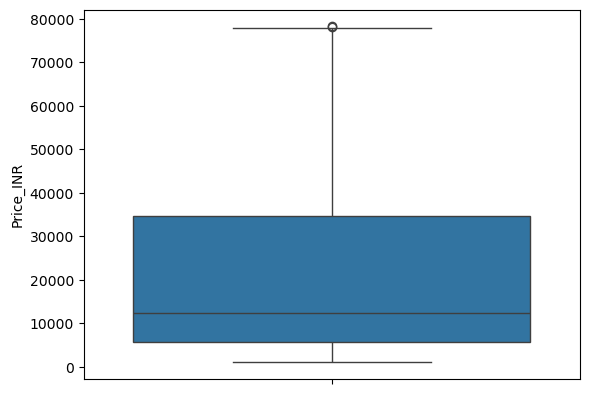

In [237]:
sns.boxplot(df["Price_INR"])

In [238]:
# q1=df["Price_INR"].quantile(0.25)
# q3=df["Price_INR"].quantile(0.75)
# iqr = q3-q1

# lower_limit = q1-1.5*iqr
# upper_limit = q3+1.5*iqr

# outlier = df[(df["Price_INR"] < lower_limit) | (df["Price_INR"] >upper_limit)]

# print("Outliers in Price:")
# print(outlier["Price_INR"])

##### Encoding in various columns:

In [239]:
df=pd.get_dummies(df,columns=["Brand"],drop_first=True,dtype=int)
df

,Model,Year,Engine_CC,Mileage_kmpl,Kms_Driven,Fuel_Type,Transmission,Owner_Type,Registration_City,Price_INR,Brand_Hero,Brand_Honda,Brand_Royal Enfield,Brand_Suzuki,Brand_TVS,Brand_Yamaha
0,FZ,2011,150,39.4,42551,Petrol,Manual,First,Mumbai,5435,0,0,0,0,0,1
1,R15,2007,350,35.1,48638,Petrol,Manual,First,Mumbai,7459,0,0,0,0,0,1
2,CB Shine,2010,110,42.7,38274,Petrol,Manual,Second,Jaipur,4765,0,1,0,0,0,0
3,Apache,2016,100,35.4,36531,Petrol,Manual,First,Bengaluru,9775,0,0,0,0,1,0
4,YZF,2014,650,25.5,22701,Petrol,Manual,Second,Mumbai,18215,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,CT100,2011,110,49.8,43778,Petrol,Manual,First,Bengaluru,4299,0,0,0,0,0,0
1996,YZF,2009,150,41.8,42464,Electric,Manual,First,Kolkata,5415,0,0,0,0,0,1
1997,Unicorn,2025,110,45.7,11264,Petrol,Automatic,First,Bengaluru,46170,0,1,0,0,0,0
1998,Apache,2020,150,60.4,15610,Petrol,Manual,First,Hyderabad,33453,0,0,0,0,1,0


In [240]:
df["Registration_City"].value_counts(
    
)
# One hot encodung.

Registration_City
Mumbai       217
Kolkata      208
Hyderabad    207
Bengaluru    203
Pune         199
Delhi        199
Lucknow      197
Jaipur       191
Chennai      191
Name: count, dtype: int64

In [241]:

df["Model"].value_counts(
    
)

Model
Splendor      108
XL100         103
Avenger        99
Hayate         99
YZF            93
Gixxer         93
Access         92
Activa         91
Unicorn        88
CB Shine       88
CT100          87
HF Deluxe      86
Glamour        85
Pulsar         85
Jupiter        81
R15            79
Hunter350      78
Apache         76
FZ             72
Bullet350      67
Classic350     62
Name: count, dtype: int64

In [242]:
# Labelencoder::
df["Owner_Type"].value_counts( 
    
)

Owner_Type
First      1097
Second      469
Third       160
Fourth+      86
Name: count, dtype: int64

In [243]:
# Label::
df["Transmission"].value_counts(
    
)

Transmission
Manual       1302
Automatic     510
Name: count, dtype: int64

In [244]:
# Label::
df["Fuel_Type"].value_counts(
    
)

Fuel_Type
Petrol      1775
Electric      37
Name: count, dtype: int64

In [245]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Owner_Type"]=encoder.fit_transform(df["Owner_Type"])

In [246]:
from sklearn.preprocessing import LabelEncoder
encoder1=LabelEncoder()
df["Transmission"]=encoder1.fit_transform(df["Transmission"])

In [247]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()
df["Fuel_Type"]=encoder2.fit_transform(df["Fuel_Type"])

In [248]:
df

,Model,Year,Engine_CC,Mileage_kmpl,Kms_Driven,Fuel_Type,Transmission,Owner_Type,Registration_City,Price_INR,Brand_Hero,Brand_Honda,Brand_Royal Enfield,Brand_Suzuki,Brand_TVS,Brand_Yamaha
0,FZ,2011,150,39.4,42551,1,1,0,Mumbai,5435,0,0,0,0,0,1
1,R15,2007,350,35.1,48638,1,1,0,Mumbai,7459,0,0,0,0,0,1
2,CB Shine,2010,110,42.7,38274,1,1,2,Jaipur,4765,0,1,0,0,0,0
3,Apache,2016,100,35.4,36531,1,1,0,Bengaluru,9775,0,0,0,0,1,0
4,YZF,2014,650,25.5,22701,1,1,2,Mumbai,18215,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,CT100,2011,110,49.8,43778,1,1,0,Bengaluru,4299,0,0,0,0,0,0
1996,YZF,2009,150,41.8,42464,0,1,0,Kolkata,5415,0,0,0,0,0,1
1997,Unicorn,2025,110,45.7,11264,1,0,0,Bengaluru,46170,0,1,0,0,0,0
1998,Apache,2020,150,60.4,15610,1,1,0,Hyderabad,33453,0,0,0,0,1,0


In [249]:
#pd.options.display.float_format="{:.2f}".format
g=df.groupby("Model")
mean=g["Price_INR"].mean()
print(mean)

Model
Access        28477.695652
Activa        23811.659341
Apache        19258.947368
Avenger       18060.676768
Bullet350     26214.432836
CB Shine      21614.863636
CT100         21103.172414
Classic350    25893.951613
FZ            23342.708333
Gixxer        25277.956989
Glamour       18694.764706
HF Deluxe     18608.500000
Hayate        21163.404040
Hunter350     22556.525641
Jupiter       21002.666667
Pulsar        17324.647059
R15           23496.734177
Splendor      19036.092593
Unicorn       19539.090909
XL100         23182.912621
YZF           22830.462366
Name: Price_INR, dtype: float64


In [250]:
m=mean.sort_values(ascending=False)
m

Model
Access        28477.695652
Bullet350     26214.432836
Classic350    25893.951613
Gixxer        25277.956989
Activa        23811.659341
R15           23496.734177
FZ            23342.708333
XL100         23182.912621
YZF           22830.462366
Hunter350     22556.525641
CB Shine      21614.863636
Hayate        21163.404040
CT100         21103.172414
Jupiter       21002.666667
Unicorn       19539.090909
Apache        19258.947368
Splendor      19036.092593
Glamour       18694.764706
HF Deluxe     18608.500000
Avenger       18060.676768
Pulsar        17324.647059
Name: Price_INR, dtype: float64

In [251]:
def bike(x):
    if x in m.index[0:8]:
        return 2
    elif x in m.index[8:15]:
        return 1
    else :
        return 0

df["Model"]=df["Model"].apply(bike)
df

,Model,Year,Engine_CC,Mileage_kmpl,Kms_Driven,Fuel_Type,Transmission,Owner_Type,Registration_City,Price_INR,Brand_Hero,Brand_Honda,Brand_Royal Enfield,Brand_Suzuki,Brand_TVS,Brand_Yamaha
0,2,2011,150,39.4,42551,1,1,0,Mumbai,5435,0,0,0,0,0,1
1,2,2007,350,35.1,48638,1,1,0,Mumbai,7459,0,0,0,0,0,1
2,1,2010,110,42.7,38274,1,1,2,Jaipur,4765,0,1,0,0,0,0
3,0,2016,100,35.4,36531,1,1,0,Bengaluru,9775,0,0,0,0,1,0
4,1,2014,650,25.5,22701,1,1,2,Mumbai,18215,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2011,110,49.8,43778,1,1,0,Bengaluru,4299,0,0,0,0,0,0
1996,1,2009,150,41.8,42464,0,1,0,Kolkata,5415,0,0,0,0,0,1
1997,1,2025,110,45.7,11264,1,0,0,Bengaluru,46170,0,1,0,0,0,0
1998,0,2020,150,60.4,15610,1,1,0,Hyderabad,33453,0,0,0,0,1,0


In [252]:
df["Model"].value_counts()

Model
2    659
1    614
0    539
Name: count, dtype: int64

In [253]:
from sklearn.compose import ColumnTransformer
from sklearn. preprocessing import OneHotEncoder

ct=ColumnTransformer([("encode",OneHotEncoder(drop="first"),[8])],remainder="passthrough")
df=ct.fit_transform(df)
df

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### seperate independent columns & dependent column from dataset.

In [254]:
# spliting::
x=df[0:,:-7]
y=df[0:,-7]

##### Standardization of features

In [255]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.34326156, -0.35124436, -0.35912667, ...,  0.14437822,
         0.62586346, -0.761345  ],
       [-0.34326156, -0.35124436, -0.35912667, ...,  0.14437822,
         0.62586346, -0.761345  ],
       [-0.34326156, -0.35124436, -0.35912667, ...,  0.14437822,
         0.62586346,  1.07317247],
       ...,
       [-0.34326156, -0.35124436, -0.35912667, ...,  0.14437822,
        -1.59779259, -0.761345  ],
       [-0.34326156, -0.35124436,  2.78453285, ...,  0.14437822,
         0.62586346, -0.761345  ],
       [-0.34326156, -0.35124436, -0.35912667, ...,  0.14437822,
        -1.59779259,  0.15591374]])

#### Splitting the dataset into Training and Testing Sets

In [256]:
# testing::
# testing::
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [257]:
print(y_test)

[ 5480. 63861. 43407. 69322. 59728. 27148.  9828.  9062. 41992.  3674.
 54345.  9988. 10731.  5386. 60080.  7560. 77065.  4832.  6861. 35008.
 34365.  7754. 38594.  3885. 18175.  8705. 57852.  4324.  6189. 11904.
  7868. 36561. 10342.  3515.  4919. 12822.  6516. 31025. 44162. 44237.
 15518. 63348. 53259. 10865. 28828.  4041. 10545.  7385.  4708. 49017.
 69775. 28777. 53391. 40332. 38779. 19088.  8951.  6171. 25561. 14992.
  4705.  4681. 16218. 17148. 13361.  5255.  4910. 48454.  4416.  5121.
  6503. 44890. 75332. 65571.  4033.  9337.  5503.  8816. 43439. 13121.
 10695. 21795.  5825.  4206. 40486. 15471.  3881. 44919. 37160. 17321.
 61787. 47185. 20269. 46675.  8038.  5604.  5854.  4486.  4949.  5968.
  5382. 14358. 26531. 54112.  4054.  5325. 19001. 55101. 36770.  9912.
 23862. 60923.  6887. 22827. 12552. 70037. 11798. 11545.  3653. 11976.
  4324. 41574.  5225. 29596.  7280. 39099. 10499. 34570.  8211.  6974.
  3748. 68929.  6371. 22917.  9279.  6303.  8610.  4259. 29972. 32526.
 12367

#### Model building and comparison

In [258]:
from sklearn.ensemble import RandomForestRegressor
rtr=RandomForestRegressor(n_estimators=100)

rtr.fit(x_train,y_train)

RandomForestRegressor()

In [259]:
y_pred=rtr.predict(x_test)

#### R2_Score of RandomForestRegressor

In [260]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))


0.9202175401475423


In [261]:
from sklearn.tree import DecisionTreeRegressor   

dtr=DecisionTreeRegressor(max_depth=5)  
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [262]:
y_pred=dtr.predict(x_test)

#### R2_Score of DecisionTreeRegressor

In [263]:
print(r2_score(y_test,y_pred))

0.9128210996969597


In [264]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=3)   #  3 points ka ucleadian distance check krna hai..
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [265]:
y_pred=dtr.predict(x_test)

#### R2_Score of KNeighborsRegressor

In [266]:
print(r2_score(y_test,y_pred))

0.9128210996969597


#### Cross Validation of Random Forest Regressor

In [267]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# create the model:
rfr = RandomForestRegressor()
rfr.fit(x,y)
scores = cross_val_score(rfr, x, y, cv=5, scoring='r2')

print("Cross Validation R² Scores:", scores)
print("Average R² Score:", scores.mean())

Cross Validation R² Scores: [0.86921372 0.91420863 0.9240789  0.88340628 0.94595656]
Average R² Score: 0.907372817471255


In [299]:
new_bikes= ["Model","Year","Engine_CC","Mileage_kmpl","Kms_Driven","Fuel_Type","Transmission","Owner_Type","Registration_City","Price_INR","Brand_Hero",
                            "Brand_Honda","Brand_Royal Enfield","Brand_Suzuki","Brand_TVS","Brand_Yamaha"]
x=pd.DataFrame(x,columns=new_bikes)
sample_input=x.columns
empty_input = pd.DataFrame([np.zeros(len(sample_input))],columns=sample_input)

empty_input.loc[0,"Year"]=2015
empty_input.loc[0,"Engine_CC"]=100	
empty_input.loc[0,"Mileage_kmpl"]=39.8			
empty_input.loc[0,"Kms_Driven"]=42464
empty_input.loc[0,"Price_INR"]=	10000

predict_bike = dtr.predict(empty_input.values)
print("Prediction Bike(INR):",predict_bike[0])


Prediction Bike(INR): 71699.6875


In [296]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit your model
rfr.fit(x_train, y_train)

# Evaluate
train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.807252181452283
Test Score: 0.826202036930268


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names



In [269]:
# Year = int(input("Enter year of purchase: "))
# Kms_Driven = int(input("Enter kilometers driven: "))
# Mileage_kmpl = float(input("Enter mileage: "))
# Engine_CC = int(input("Enter engine capacity (CC): "))
# Owner_Type = int(input("Enter owner type (0 = First, 1 = Second, 2=Third, 3=Fourth+): "))
# Fuel_Type = int(input("Enter fuel type (0 = Petrol, 1 = Diesel, etc.): "))

# custom_input = np.array([[Year, Kms_Driven, Mileage_kmpl, Engine_CC, Owner_Type, Fuel_Type]])
# custom_input_scaled = scaler.transform(custom_input)
# price_pred = rf.predict(custom_input_scaled)
# print(f"Estimated Bike Price: ₹{price_pred[0]:,.2f}")